# 🍽️ Zomato Restaurant Data — Data Cleaning & Exploratory Analysis

## Project Overview
Zomato is one of the world's largest restaurant discovery and food delivery platforms. This project performs end-to-end **data cleaning and exploratory data analysis (EDA)** on a global Zomato dataset to uncover insights about restaurant distribution, user ratings, cuisine preferences, and online delivery trends.

## Dataset
- **Source:** Zomato Restaurants Dataset (Kaggle)  
- **Size:** ~9,551 restaurants across 15 countries  
- **Additional file:** Country-Code lookup table for enriching location data  

## Key Questions
1. Which countries and cities have the highest restaurant presence on Zomato?  
2. How are restaurants rated, and which countries have the lowest engagement?  
3. Which cuisines are most popular by votes?  
4. Where is online delivery available, and how does it compare to dine-in?

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid')
matplotlib.rcParams['figure.figsize'] = (14, 5)

## 2. Load Data

In [2]:
df = pd.read_csv('./zomato_dataset/zomato.csv', encoding='latin-1')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## 3. Data Cleaning

### 3.1 Check for Missing Values

In [4]:
missing = df.isnull().sum()
missing_cols = missing[missing > 0]
print("Columns with missing values:")
print(missing_cols)
print()
for col in missing_cols.index:
    pct = missing_cols[col] / len(df) * 100
    print(f"  {col}: {missing_cols[col]} missing ({pct:.1f}%)")

Columns with missing values:
Cuisines    9
dtype: int64

  Cuisines: 9 missing (0.1%)


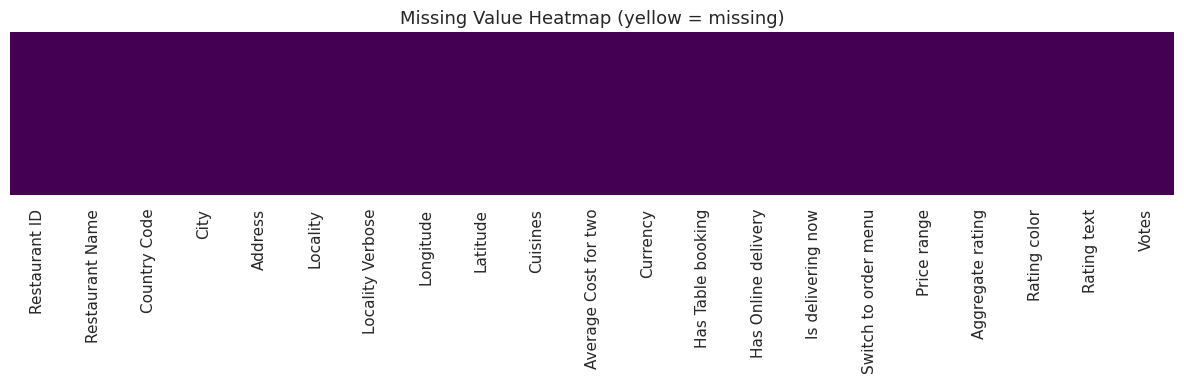

In [5]:
# Visualise missing data pattern
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap (yellow = missing)', fontsize=13)
plt.tight_layout()
plt.show()

**Findings:**  
- `Cuisines` has a small number of missing values (~9 rows, <0.1%). These rows are dropped since cuisine is central to the analysis.  
- All other columns are complete.

In [6]:
# Drop rows where Cuisines is null — too few to impute meaningfully
before = len(df)
df = df.dropna(subset=['Cuisines'])
print(f"Rows before: {before} | After dropping null Cuisines: {len(df)} | Dropped: {before - len(df)}")

Rows before: 9551 | After dropping null Cuisines: 9542 | Dropped: 9


### 3.2 Check for Duplicates

In [7]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
# No duplicates — nothing to drop

Duplicate rows: 0


### 3.3 Fix Column Name Inconsistencies

In [8]:
# Strip any accidental whitespace from column names
df.columns = df.columns.str.strip()
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


### 3.4 Validate Key Columns

In [9]:
# Check Aggregate rating range — should be 0 to 5
print(f"Aggregate rating range: {df['Aggregate rating'].min()} – {df['Aggregate rating'].max()}")

# Check Votes — should be non-negative
print(f"Votes range: {df['Votes'].min()} – {df['Votes'].max()}")

# Unique values in Has Online delivery
print(f"Has Online delivery values: {df['Has Online delivery'].unique()}")

# Unique values in Has Table booking
print(f"Has Table booking values:   {df['Has Table booking'].unique()}")

Aggregate rating range: 0.0 – 4.9
Votes range: 0 – 10934
Has Online delivery values: ['No' 'Yes']
Has Table booking values:   ['Yes' 'No']


### 3.5 Enrich with Country Names
The raw dataset contains only numeric `Country Code`. We merge with a lookup table to get human-readable country names.

In [12]:
df_country = pd.read_excel('./zomato_dataset/Country-Code.xlsx')
print("Country lookup table:")
df_country.head()

Country lookup table:


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
df = pd.merge(df, df_country, on='Country Code', how='left')

# Verify merge — no nulls expected in Country column
print(f"Null Country values after merge: {df['Country'].isnull().sum()}")
print(f"Enriched dataset shape: {df.shape}")
df[['Restaurant Name', 'City', 'Country', 'Cuisines']].head(3)

Null Country values after merge: 0
Enriched dataset shape: (9542, 22)


,Restaurant Name,City,Country,Cuisines
0,Le Petit Souffle,Makati City,Phillipines,"French, Japanese, Desserts"
1,Izakaya Kikufuji,Makati City,Phillipines,Japanese
2,Heat - Edsa Shangri-La,Mandaluyong City,Phillipines,"Seafood, Asian, Filipino, Indian"


### 3.6 Final Cleaned Dataset Summary

In [14]:
print(f"Shape: {df.shape}")
print(f"Countries covered: {df['Country'].nunique()}")
print(f"Cities covered   : {df['City'].nunique()}")
print(f"Unique cuisines  : {df['Cuisines'].nunique()}")
print()
print("Remaining nulls:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Shape: (9542, 22)
Countries covered: 15
Cities covered   : 140
Unique cuisines  : 1825

Remaining nulls:
Series([], dtype: int64)


## 4. Exploratory Data Analysis

### 4.1 Country Distribution
Which country has the most restaurants on Zomato?

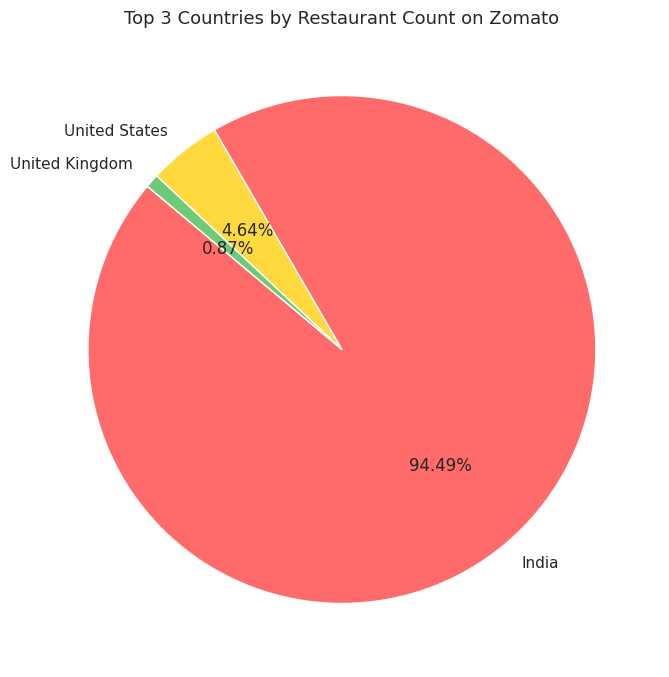


Full country breakdown:
Country
India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4


In [15]:
country_counts = df['Country'].value_counts()

# Pie chart — top 3 countries
plt.figure(figsize=(7, 7))
plt.pie(
    country_counts.values[:3],
    labels=country_counts.index[:3],
    autopct='%1.2f%%',
    startangle=140,
    colors=['#FF6B6B', '#FFD93D', '#6BCB77']
)
plt.title('Top 3 Countries by Restaurant Count on Zomato', fontsize=13)
plt.tight_layout()
plt.show()

print("\nFull country breakdown:")
print(country_counts.to_string())

**Observation:** India accounts for the overwhelming majority (~94%) of Zomato restaurant listings, reflecting the platform's origin and primary market. The analysis below is therefore most representative of Indian restaurants.

### 4.2 Rating Distribution

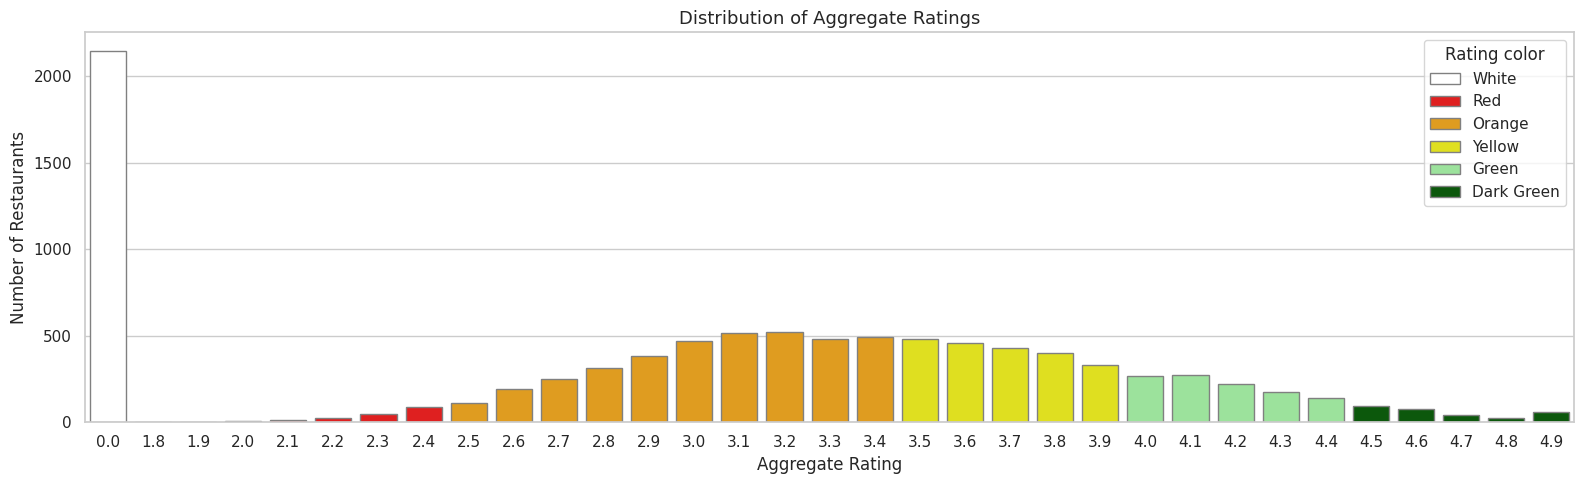

In [16]:
ratings = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name='Count')

matplotlib.rcParams['figure.figsize'] = (16, 5)
sns.barplot(
    x='Aggregate rating', y='Count', data=ratings,
    hue='Rating color',
    palette=['white', 'red', 'orange', 'yellow', 'lightgreen', 'darkgreen'],
    edgecolor='grey'
)
plt.title('Distribution of Aggregate Ratings', fontsize=13)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

**Observations:**  
1. The largest single group is restaurants with a rating of **0.0** (shown in white/"Not rated") — a significant number of restaurants have never been reviewed.  
2. Among rated restaurants, most fall in the **2.8–3.4** range, skewing toward average-to-good ratings.

### 4.3 Countries with Zero Ratings
Which countries have the most unrated restaurants?

/tmp/ipykernel_3856/3326364983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Unrated Count', data=non_rated_by_country, palette='Reds_r')


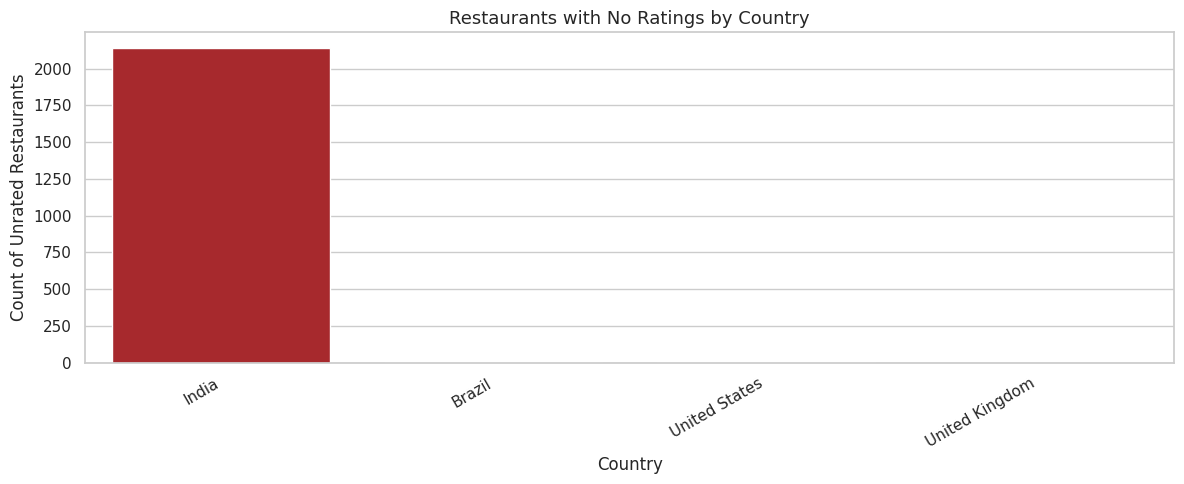

       Country  Unrated Count
         India           2139
        Brazil              5
 United States              3
United Kingdom              1


In [17]:
non_rated = df[df['Rating color'] == 'White']
non_rated_by_country = non_rated.groupby('Country').size().reset_index(name='Unrated Count').sort_values('Unrated Count', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Country', y='Unrated Count', data=non_rated_by_country, palette='Reds_r')
plt.title('Restaurants with No Ratings by Country', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Count of Unrated Restaurants')
plt.tight_layout()
plt.show()

print(non_rated_by_country.to_string(index=False))

**Observation:** India has 2,139 unrated restaurants, followed by the USA (3), Brazil (5), and the UK (1). The high number in India is proportional to India's dominant share of the dataset.

### 4.4 Currency by Country
Each country uses its own currency — useful context for any price analysis.

In [18]:
currency_country = (
    df[['Country', 'Currency']]
    .drop_duplicates()
    .sort_values('Country')
    .reset_index(drop=True)
)
print(currency_country.to_string(index=False))

       Country               Currency
     Australia              Dollar($)
        Brazil     Brazilian Real(R$)
        Canada              Dollar($)
         India     Indian Rupees(Rs.)
     Indonesia Indonesian Rupiah(IDR)
   New Zealand          NewZealand($)
   Phillipines       Botswana Pula(P)
         Qatar        Qatari Rial(QR)
     Singapore              Dollar($)
  South Africa                Rand(R)
     Sri Lanka  Sri Lankan Rupee(LKR)
        Turkey       Turkish Lira(TL)
           UAE     Emirati Diram(AED)
United Kingdom             Pounds(£)
 United States              Dollar($)


### 4.5 Online Delivery Availability by Country

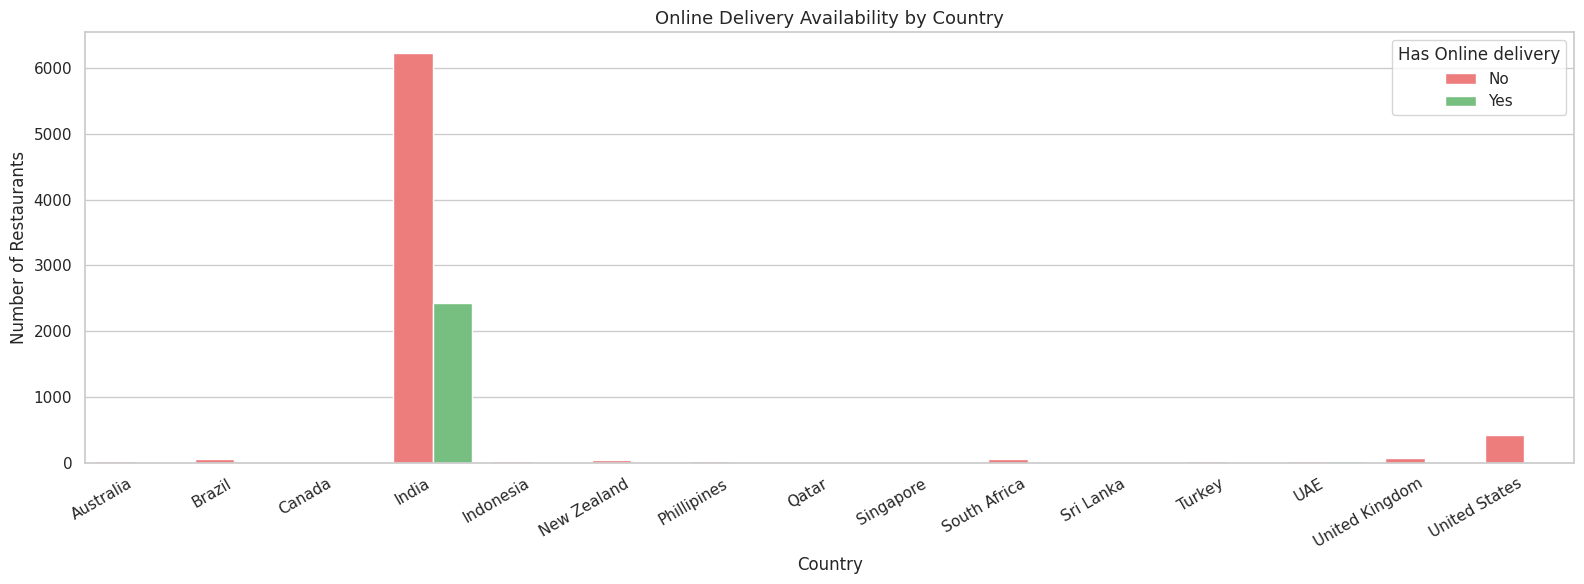

In [19]:
delivery = (
    df.groupby(['Country', 'Has Online delivery'])
    .size()
    .reset_index(name='Count')
)

matplotlib.rcParams['figure.figsize'] = (16, 6)
sns.barplot(x='Country', y='Count', hue='Has Online delivery', data=delivery, palette=['#FF6B6B', '#6BCB77'])
plt.title('Online Delivery Availability by Country', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

**Observation:** Online delivery is available only in **India and the UAE**. Even within India — where delivery infrastructure is highly developed — the majority of listed restaurants still operate primarily as dine-in establishments.

### 4.6 Top 5 Cities by Restaurant Count

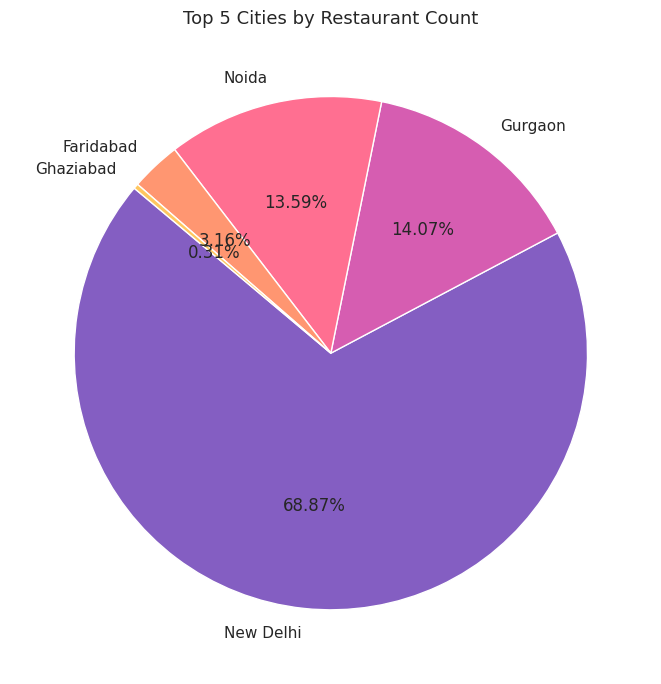

In [20]:
city_counts = df['City'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    city_counts.values[:5],
    labels=city_counts.index[:5],
    autopct='%1.2f%%',
    startangle=140,
    colors=['#845EC2', '#D65DB1', '#FF6F91', '#FF9671', '#FFC75F']
)
plt.title('Top 5 Cities by Restaurant Count', fontsize=13)
plt.tight_layout()
plt.show()

### 4.7 Top 10 Most Popular Cuisines by Votes

/tmp/ipykernel_3856/1995130693.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cuisines', y='Votes', data=cuisine_votes, palette='viridis')


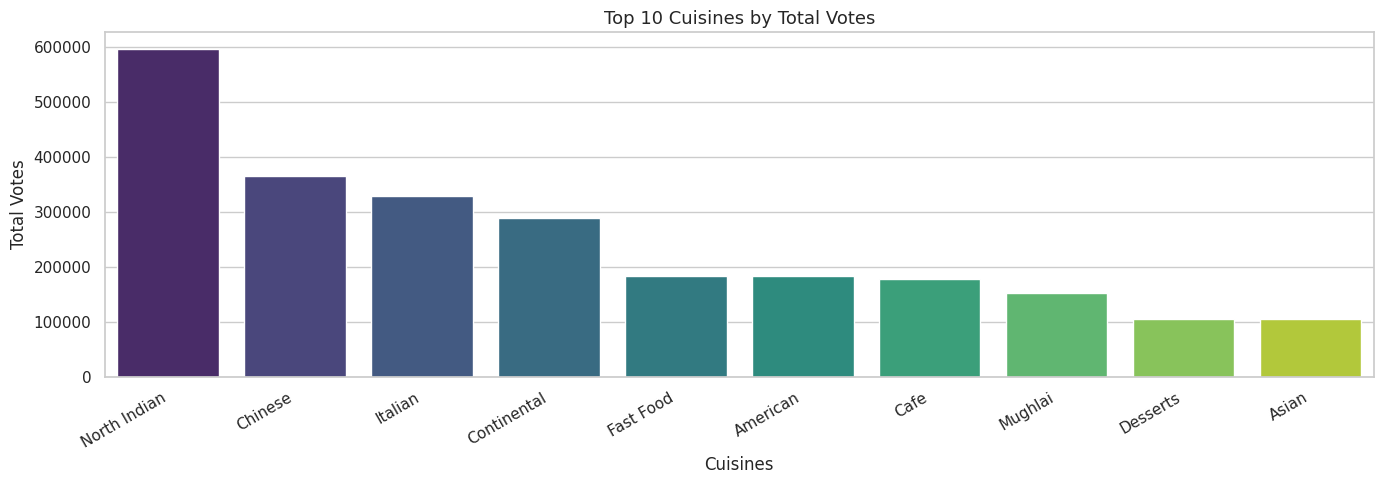

    Cuisines  Votes
North Indian 595981
     Chinese 364351
     Italian 329265
 Continental 288255
   Fast Food 184058
    American 183117
        Cafe 177568
     Mughlai 151946
    Desserts 105889
       Asian 104303


In [21]:
# Explode multi-cuisine entries and find top cuisines by total votes
cuisine_votes = (
    df[['Cuisines', 'Votes']]
    .assign(Cuisines=df['Cuisines'].str.split(', '))
    .explode('Cuisines')
    .groupby('Cuisines')['Votes']
    .sum()
    .reset_index()
    .sort_values('Votes', ascending=False)
    .head(10)
)

matplotlib.rcParams['figure.figsize'] = (14, 5)
sns.barplot(x='Cuisines', y='Votes', data=cuisine_votes, palette='viridis')
plt.title('Top 10 Cuisines by Total Votes', fontsize=13)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Votes')
plt.tight_layout()
plt.show()

print(cuisine_votes.to_string(index=False))

**Observation:** North Indian cuisine leads by a wide margin in total votes, followed by Chinese and Fast Food. This reflects Zomato's dominant user base in India.

## 5. Conclusions & Key Takeaways

### Data Cleaning Summary
| Step | Action | Reason |
|------|--------|--------|
| Dropped null `Cuisines` rows | Removed ~9 rows | Cuisine is essential; too few to impute |
| Stripped column name whitespace | Normalised headers | Prevents silent key errors |
| Validated rating & vote ranges | No outliers found | Data is within expected bounds |
| Merged Country Code lookup | Added `Country` column | Enables geographic analysis |

### EDA Insights
- **India dominates the dataset** (~94% of restaurants), making most trends India-centric.
- **A large proportion of restaurants have no ratings** — user engagement is an area of opportunity.
- **Most rated restaurants fall in the 2.8–3.4 range**, suggesting average satisfaction.
- **Online delivery is limited to India and UAE**, with dine-in still dominant even in India.
- **North Indian, Chinese, and Fast Food** are the most popular cuisine categories by total votes.
